#**Regressão Linear simples**

##Entendendo o Problema e os Dados

Fomos contratados pelo Ministério da Educação para criar um modelo que permita prever o percentual de alunos que serão aprovados em 2017, tendo como base os dados de aprovação de 2015 e 2016.

Os dados disponíveis são justamente os percentuais de aprovação de alunos nos anos de 2015 e 2016. Não temos mais informações sobre os alunos ou sobre fatores que podem influenciar as taxas de aprovação.

Portanto, nosso objetivo é utilizar os dados históricos de aprovação para treinar um modelo de regressão linear que permita estimar a taxa de aprovação para o ano seguinte.

Vamos assumir que os dados representam alguma região ou nível de ensino específico, de forma que as taxas de aprovação de um ano para o outro tenham alguma correlação.



#**Setup**

In [12]:
import pandas as pd # manipulação de dados
import numpy as np # computação científica, operadores matemáticos e algébricas
import matplotlib.pyplot as plt  #visualização e plotagem de gráficos.
import seaborn as sns #visualização de dados e gráficos estatísticos
import statsmodels.api as sm #estatísticas e modelagem incluindo regressão linear

In [6]:
# Importando a base de dados
alunos = pd.read_excel('/content/drive/MyDrive/Upload de arquivos das aulas da DNC/Exercío prático regressão linear simples/Aprovação de alunos.xlsx')
alunos.head()

,UF,ano_2015,ano_2016
0,Rondonia,77,85
1,Acre,79,81
2,Amazonas,83,85
3,Roraima,81,82
4,Para,73,76


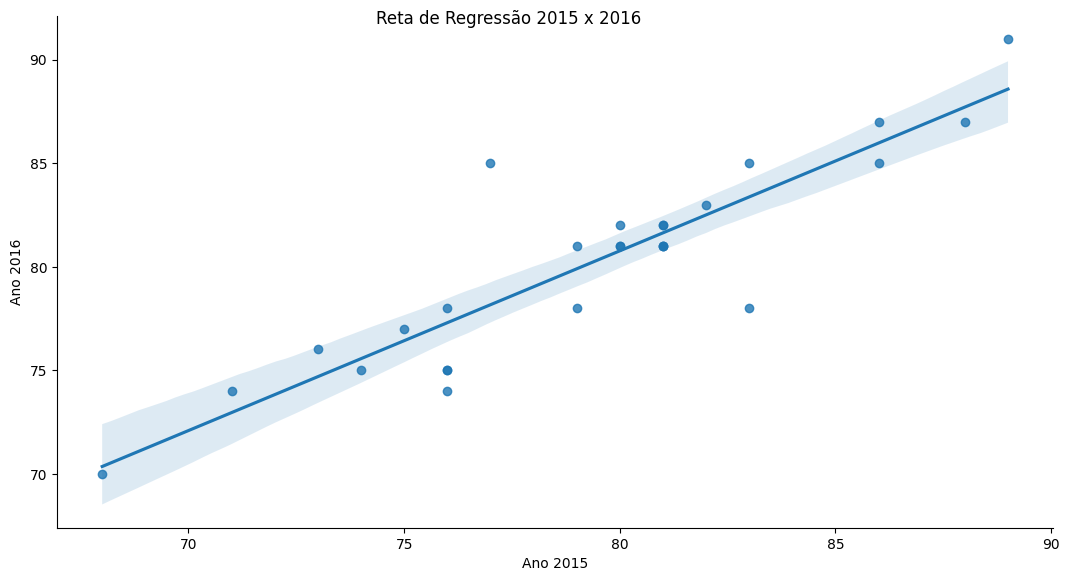

In [9]:
# Gerando o gráfico de dispessão
ax = sns.lmplot(x='ano_2015', y='ano_2016', data=alunos)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão 2015 x 2016')
ax.set_xlabels('Ano 2015')
ax.set_ylabels('Ano 2016')
ax;

In [11]:
# Observando a correlação dos dados

# Selecionando apenas as colunas numéricas para calcular a correlação
numeric_alunos = alunos.select_dtypes(include=['number'])

# Observando a correlação dos dados
numeric_alunos.corr()

,ano_2015,ano_2016
ano_2015,1.000000,0.894957
ano_2016,0.894957,1.000000


In [15]:
# Fazendo a previsão desses dados
Y = alunos['ano_2016']
X = sm.add_constant(alunos.ano_2015)
resultado_regressao = sm.OLS(Y, X).fit()
print(resultado_regressao.summary())


                            OLS Regression Results                            
Dep. Variable:               ano_2016   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     100.6
Date:                Mon, 08 Jul 2024   Prob (F-statistic):           3.02e-10
Time:                        20:06:48   Log-Likelihood:                -58.476
No. Observations:                  27   AIC:                             121.0
Df Residuals:                      25   BIC:                             123.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.3143      6.880      1.645      0.1

In [16]:
# Criando uma coluna de predição
alunos['y_previsto'] = resultado_regressao.predict()
alunos.head()

,UF,ano_2015,ano_2016,y_previsto
0,Rondonia,77,85,78.159571
1,Acre,79,81,79.895812
2,Amazonas,83,85,83.368294
3,Roraima,81,82,81.632053
4,Para,73,76,74.687089


In [17]:
# Criando uma coluna de resíduo
alunos['resíduo'] = alunos['ano_2016'] - alunos['y_previsto']
alunos.head()

,UF,ano_2015,ano_2016,y_previsto,resíduo
0,Rondonia,77,85,78.159571,6.840429
1,Acre,79,81,79.895812,1.104188
2,Amazonas,83,85,83.368294,1.631706
3,Roraima,81,82,81.632053,0.367947
4,Para,73,76,74.687089,1.312911


#**Considerações Finais**

Foram demonstradas etapas cruciais de um projeto de análise de dados, como preparação dos dados, análise exploratória, desenvolvimento de modelo preditivo e avaliação de resultados.

Técnicas como regressão linear são ferramentas poderosas para extrair insights de dados e fazer previsões.